In [ ]:
!pip install mplfinance
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import mplfinance as mplf
plt.style.use('fivethirtyeight')

     |████████████████████████████████| 61kB 3.0MB/s 


In [ ]:
df = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2020-12-27') # Extraction of AAPL stock data since beginning of 2020
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


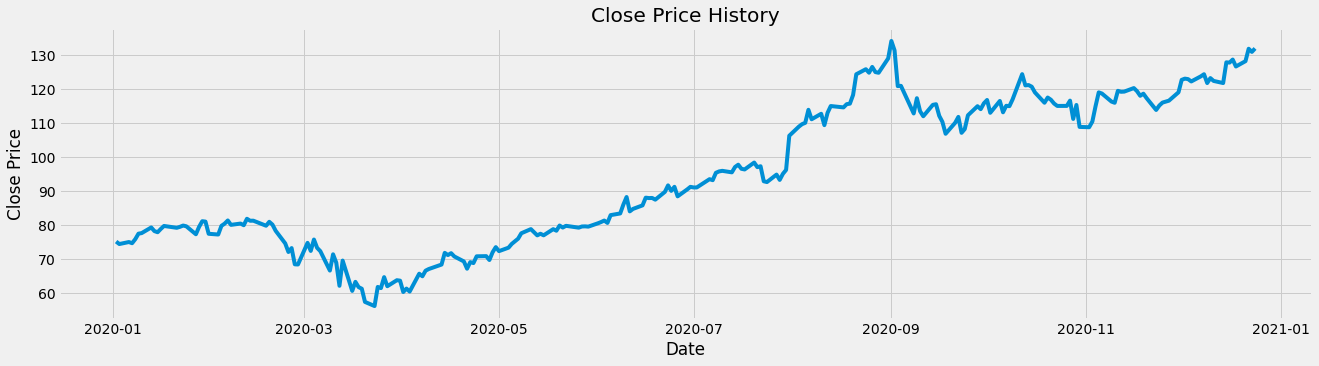

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Close Price History')
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

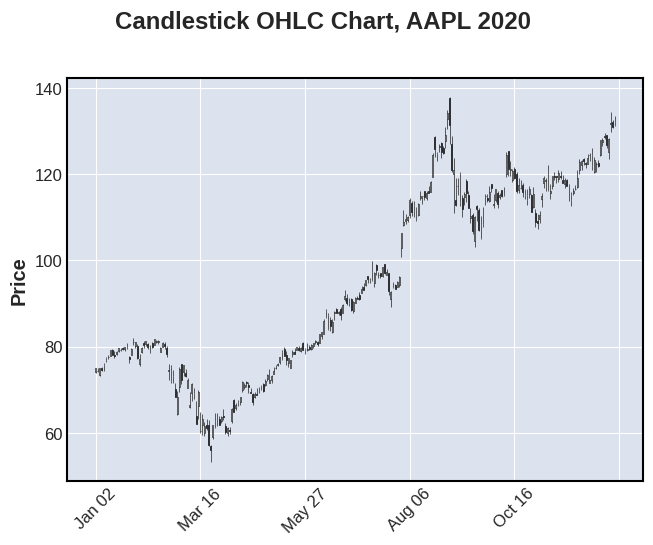

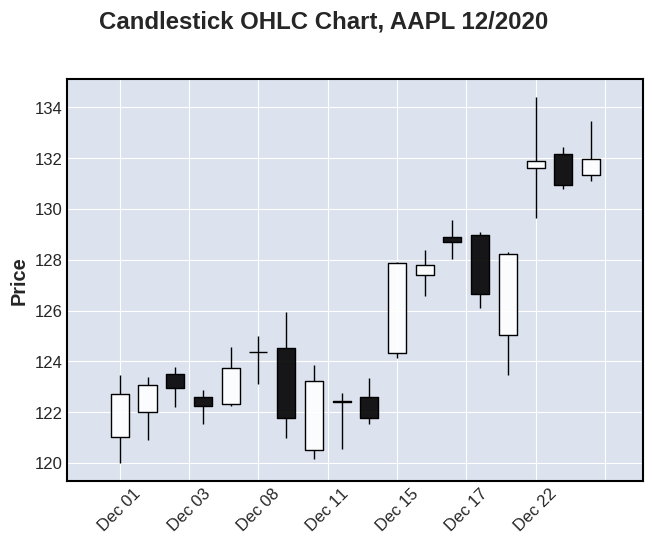

In [ ]:
mplf.plot(df,type='candlestick', no_xgaps=True, title="Candlestick OHLC Chart, AAPL 2020")
mplf.plot(df["2020-12-01":],type='candlestick', no_xgaps=True, title="Candlestick OHLC Chart, AAPL 12/2020")

In [ ]:
data = df.filter(["Close"])
arr = data.values

training_data_len = math.ceil(len(arr)*.8)

scaled = MinMaxScaler(feature_range=(0,1))
scaled_data = scaled.fit_transform(arr)
scaled_data

array([[0.24325282],
       [0.23390428],
       [0.24149191],
       [0.23697783],
       [0.25234517],
       [0.27296307],
       [0.27520409],
       [0.2964303 ],
       [0.28272772],
       [0.27843768],
       [0.29092365],
       [0.30209708],
       [0.29518175],
       [0.2987995 ],
       [0.30369785],
       [0.30075239],
       [0.27078605],
       [0.29876746],
       [0.32005766],
       [0.31855293],
       [0.27257891],
       [0.26985758],
       [0.30248125],
       [0.31080527],
       [0.32284298],
       [0.30625904],
       [0.31112534],
       [0.30491435],
       [0.3292141 ],
       [0.32175447],
       [0.32201064],
       [0.30296146],
       [0.31775255],
       [0.30712342],
       [0.28391228],
       [0.23630544],
       [0.20396989],
       [0.21860094],
       [0.15735552],
       [0.15684327],
       [0.23832242],
       [0.20793987],
       [0.25090444],
       [0.21946542],
       [0.20701139],
       [0.1338243 ],
       [0.19519771],
       [0.163

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(scaled_data[i-60:i, 0])
  y_train.append(scaled_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.24325282, 0.23390428, 0.24149191, 0.23697783, 0.25234517,
       0.27296307, 0.27520409, 0.2964303 , 0.28272772, 0.27843768,
       0.29092365, 0.30209708, 0.29518175, 0.2987995 , 0.30369785,
       0.30075239, 0.27078605, 0.29876746, 0.32005766, 0.31855293,
       0.27257891, 0.26985758, 0.30248125, 0.31080527, 0.32284298,
       0.30625904, 0.31112534, 0.30491435, 0.3292141 , 0.32175447,
       0.32201064, 0.30296146, 0.31775255, 0.30712342, 0.28391228,
       0.23630544, 0.20396989, 0.21860094, 0.15735552, 0.15684327,
       0.23832242, 0.20793987, 0.25090444, 0.21946542, 0.20701139,
       0.1338243 , 0.19519771, 0.16347047, 0.07638867, 0.1716024 ,
       0.05711546, 0.09121181, 0.07139428, 0.06534338, 0.01559152,
       0.        , 0.07206663, 0.06771254, 0.10907639, 0.07481995])]
[0.09745479372714483]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(140, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

 24/140 [====>.........................] - ETA: 2s - loss: 0.1082

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = arr[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaled.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


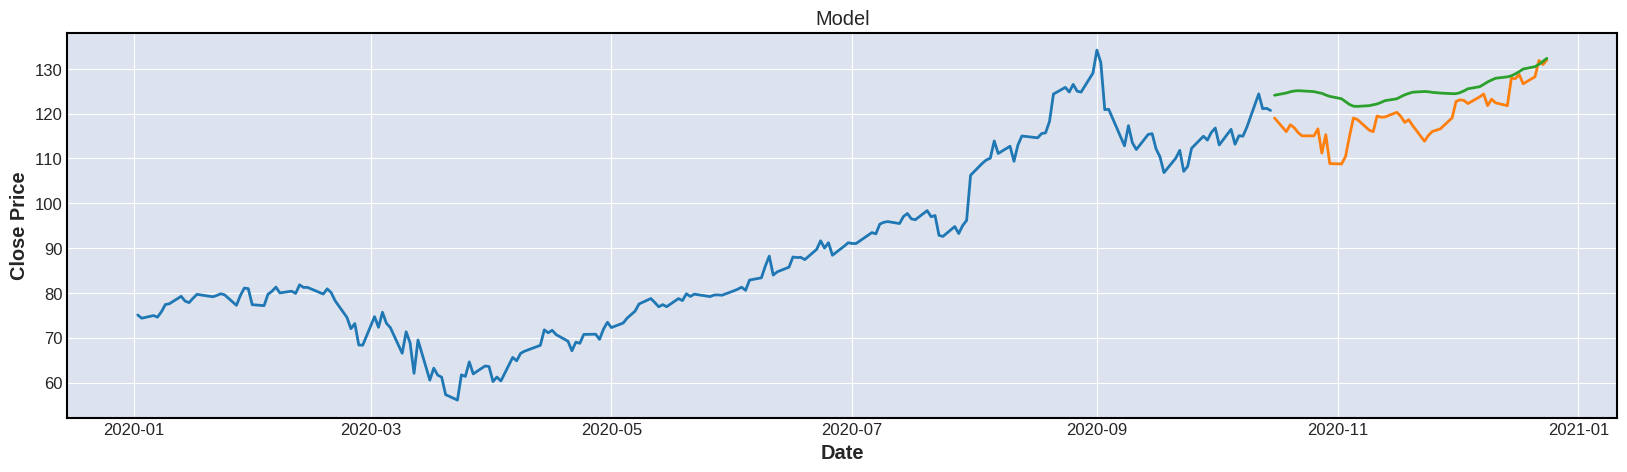

In [21]:
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

plt.figure(figsize=(20,5))
plt.title('Model')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train["Close"])
plt.plot(test[["Close", "Predictions"]])
plt.show()